# **Computer Vision in HealthCare Application**

## **LAB-2**


**Name:** Sarvesh Sridhar

**Reg.No:** 19BAI1057

**Dataset used:** Skin Cancer HAM10000

**Link:** https://www.kaggle.com/surajghuwalewala/ham1000-segmentation-and-classification

### **Lab Description:** 
**Question**. Experiment different Thresholding Techniques 

---

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io, img_as_int
from skimage.util import random_noise

plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True

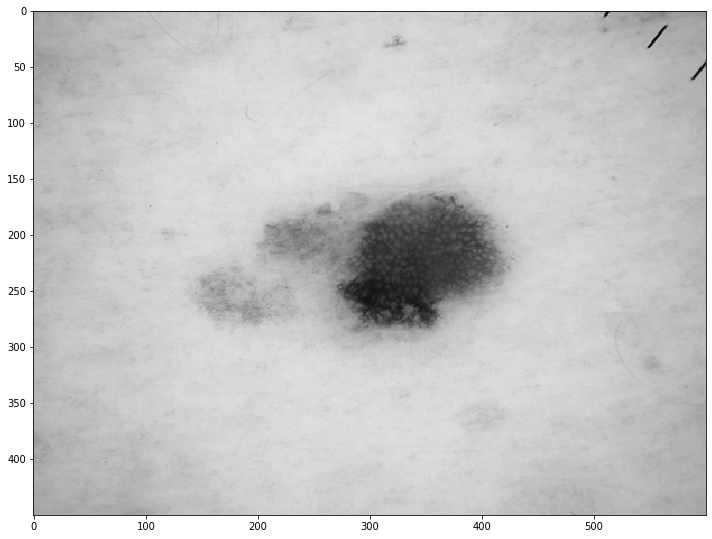

In [2]:
img = cv2.imread('D:/Datasets/HAM1000/images/ISIC_0024313.jpg',0)

io.imshow(img)

### Simple Thresholding

1. cv2.THRESH_BINARY - changes below threshold to 0, else 255


2. cv2.THRESH_BINARY_INV - changes below threshold to 255, else 0


3. cv2.THRESH_TRUNC - changes above threshold to equal to threshold


4. cv2.THRESH_TOZERO - changes below threshold equal to 0


5. cv2.THRESH_TOZERO_INV - changes above threshold equal to 0

Text(0.5, 1.0, 'Binary inverse')

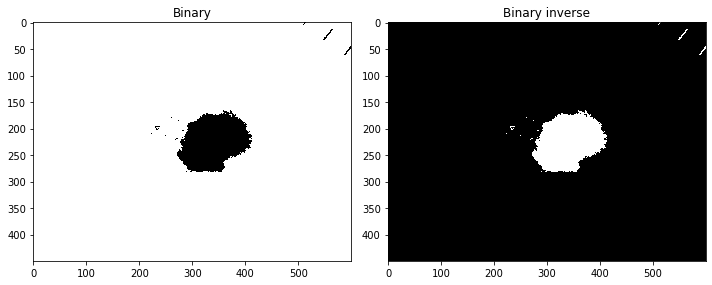

In [3]:
# GENERATE IMAGES WITH THRESHOLD
ret1, t1 = cv2.threshold(img,120,255,cv2.THRESH_BINARY)
ret2, t2 = cv2.threshold(img,120,255,cv2.THRESH_BINARY_INV)
ret3, t3 = cv2.threshold(img,120,255,cv2.THRESH_TRUNC)
ret4, t4 = cv2.threshold(img,120,255,cv2.THRESH_TOZERO)
ret5, t5 = cv2.threshold(img,120,255,cv2.THRESH_TOZERO_INV)

# SHOW IMAGES
plt.subplot(1,2,1)
io.imshow(t1)
plt.title("Binary")
plt.subplot(1,2,2)
io.imshow(t2)
plt.title("Binary inverse")

Text(0.5, 1.0, 'To zero')

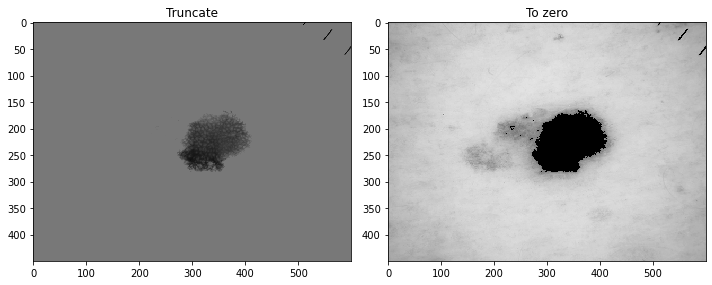

In [4]:
plt.subplot(1,2,1)
io.imshow(t3)
plt.title("Truncate")
plt.subplot(1,2,2)
io.imshow(t4)
plt.title("To zero")

Text(0.5, 1.0, 'To zero inverse')

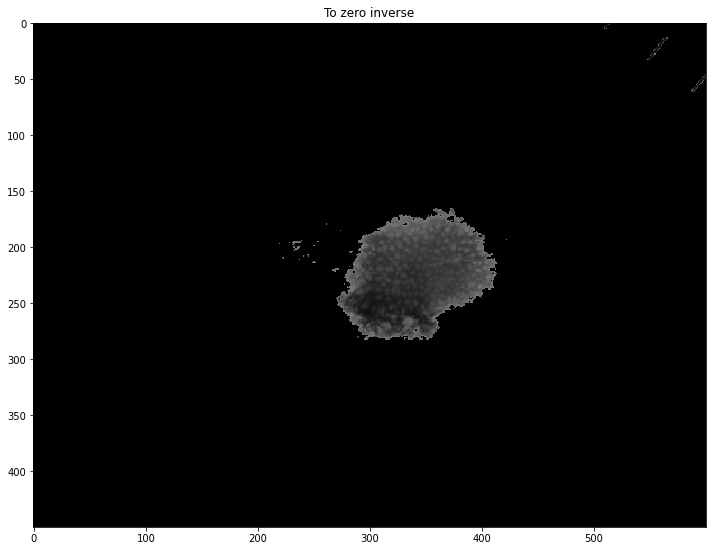

In [5]:
io.imshow(t5)
plt.title("To zero inverse")

### Adaptive Thresholding

Calculates Threshold for small regions for block_size, constant_value(do subtraction for mean or gaussian operation in algorithm).

1. **cv2.ADAPTIVE_THRESH_MEAN_C** 


2. **cv2.ADAPTIVE_THRESH_GAUSSIAN_C** 

Text(0.5, 1.0, 'ADAPTIVE_THRESH_MEAN')

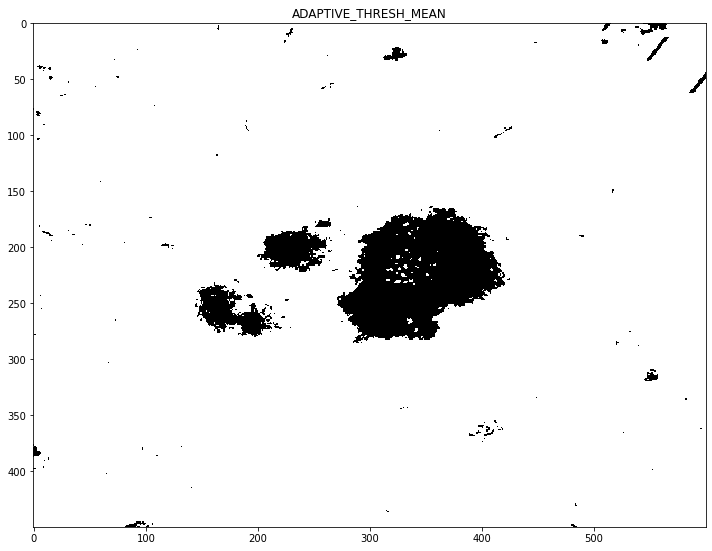

In [6]:
adap_t1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,101,17)
adap_t2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,199,14)

io.imshow(adap_t1)
plt.title("ADAPTIVE_THRESH_MEAN")

Text(0.5, 1.0, 'ADAPTIVE_THRESH_GAUSSIAN_C')

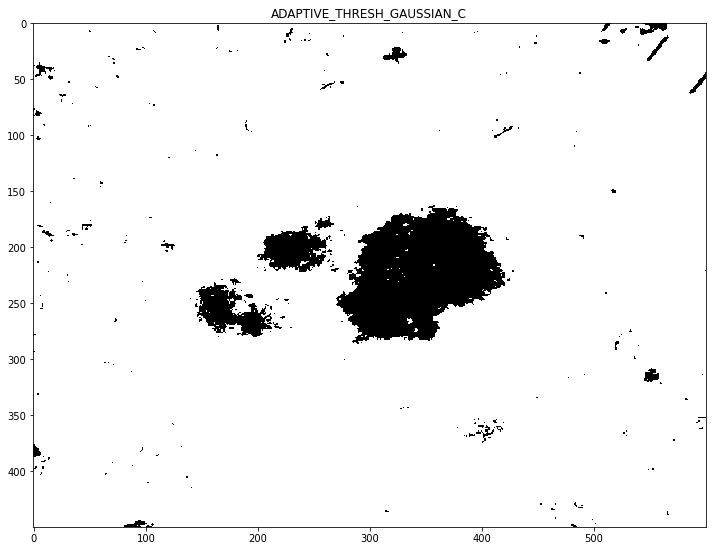

In [7]:
io.imshow(adap_t2)
plt.title("ADAPTIVE_THRESH_GAUSSIAN_C")

### OTSU THRESHOLDING

A two distinct image values is considered. The histogram generated contains two peaks. So, a generic condition would be to choose a threshold value that lies in the middle of both the histogram peak values.[1]

We can try to add other Simple Thresholding Techniques as extra key to **OTSU Thresholding**

1. **cv2.THRESH_BINARY + cv2.THRESH_OTSU**


2. **cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU**


3. **cv2.THRESH_TRUNC + cv2.THRESH_OTSU**


4. **cv2.THRESH_TOZERO + cv2.THRESH_OTSU**


5. **cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU**

Text(0.5, 1.0, 'TRUNC + OTSU')

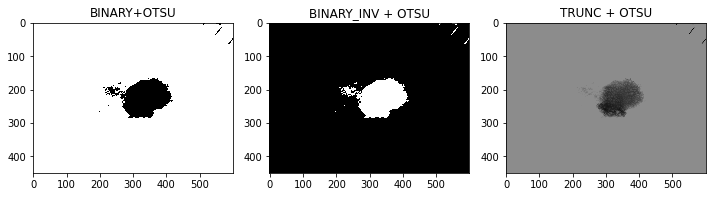

In [8]:
otsu_ret1, otsu_thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
otsu_ret2, otsu_thresh2 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
otsu_ret3, otsu_thresh3 = cv2.threshold(img, 110, 255, cv2.THRESH_TRUNC + cv2.THRESH_OTSU)


plt.subplot(1,3,1)
io.imshow(otsu_thresh1)
plt.title("BINARY+OTSU")

plt.subplot(1,3,2)
io.imshow(otsu_thresh2)
plt.title("BINARY_INV + OTSU")

plt.subplot(1,3,3)
io.imshow(otsu_thresh3)
plt.title("TRUNC + OTSU")

Text(0.5, 1.0, 'TOZERO_INV + OTSU')

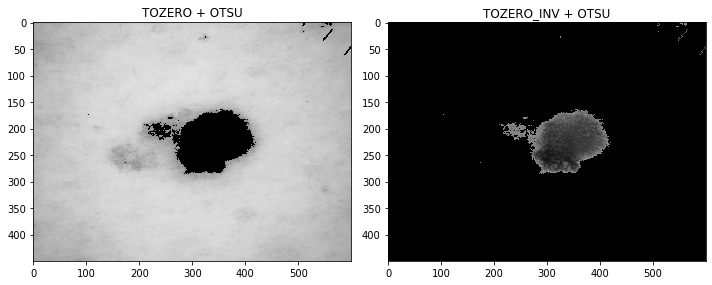

In [9]:
otsu_ret4, otsu_thresh4 = cv2.threshold(img, 10, 255, cv2.THRESH_TOZERO + cv2.THRESH_OTSU)
otsu_ret5, otsu_thresh5 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU)

plt.subplot(1,2,1)
io.imshow(otsu_thresh4)
plt.title("TOZERO + OTSU")

plt.subplot(1,2,2)
io.imshow(otsu_thresh5)
plt.title("TOZERO_INV + OTSU")

### CONCLUSION

TO conclude, **Simple Thresholding** techniques work fine with some images and wont work with some images. To calculate for different conditions of images (different lighting conditions, image clarity, etc) we try to implement a slightly complex algorithm to calculate threshold for smaller region which is **Adaptive Thresholding**. It works fine too but in my case, some data is lost in core regions. Next we try to complicate more in the algorithm by making the algorithm to calculate threshold itself which is **OTSU Thresholding**. OTSU works very well and is expected to work well for noise images too. 


### REFERENCE

[1] Python | Thresholding techniques using OpenCV | Set-3 (Otsu Thresholding) - GeeksForGeeks 
https://www.geeksforgeeks.org/python-thresholding-techniques-using-opencv-set-3-otsu-thresholding/

In [10]:
# i1 = random_noise(img, mode='poisson')
# i2 = random_noise(img, mode='gaussian')
# i3 = random_noise(img, mode='s&p')
# i4 = random_noise(img, mode='speckle')

In [11]:
# io.imshow(i1)